## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Combine the data into a single dataset
dataset_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
dataset_df.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
# Checking the number of mice.
dataset_df['Mouse ID'].nunique()

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dataset_df[dataset_df.duplicated(['Mouse ID', 'Timepoint'],keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_df = dataset_df[dataset_df['Mouse ID'] == 'g989']
duplicated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df=dataset_df[dataset_df['Mouse ID'] != 'g989']
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_data_df['Mouse ID'].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
clean_data_grp = clean_data_df.groupby('Drug Regimen')
gb_mean = clean_data_grp['Tumor Volume (mm3)'].mean()
gb_median = clean_data_grp['Tumor Volume (mm3)'].median()
gb_std = clean_data_grp['Tumor Volume (mm3)'].std()
sample = clean_data_grp.sample(30)
gb_sem = st.sem(sample['Tumor Volume (mm3)'])
gb_var = clean_data_grp['Tumor Volume (mm3)'].var()
summ_table1 = pd.DataFrame({
    'Mean':gb_mean,
    'Median':gb_median,
    'Variance':gb_var,
    'Standard Deviation':gb_std,
    'SEM':gb_sem
})
summ_table1

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.491327
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.491327
Infubinol,52.884795,51.820584,43.128684,6.567243,0.491327
Ketapril,55.235638,53.698743,68.553577,8.279709,0.491327
Naftisol,54.331565,52.509285,66.173479,8.134708,0.491327
Placebo,54.033581,52.288934,61.168083,7.821003,0.491327
Propriva,52.320930,50.446266,43.852013,6.622085,0.491327
Ramicane,40.216745,40.673236,23.486704,4.846308,0.491327
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.491327


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



<AxesSubplot:title={'center':'Distribution by Sex (pandas)'}, ylabel='Sex'>

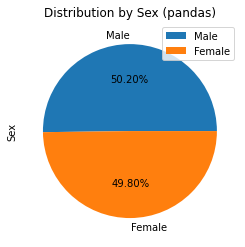

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = mouse_metadata['Sex'].value_counts()
sex_count_df = pd.DataFrame(sex_counts)
sex_count_df.plot(y='Sex',kind='pie',autopct='%.2f%%',title='Distribution by Sex (pandas)')
#male_count = sex_counts['Male']
#female_count = sex_counts['Female']


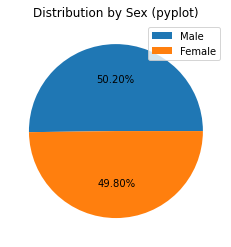

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
plt.pie(sex_count_df["Sex"],autopct='%.2f%%')
plt.title('Distribution by Sex (pyplot)')
plt.legend(labels)

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = clean_data_df.groupby('Mouse ID').max(['Timepoint'])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_regimen = pd.merge(final_timepoint,clean_data_df[['Mouse ID', 'Drug Regimen']],how='inner', on='Mouse ID').drop_duplicates().reset_index(drop=True)
tumor_regimen

,Mouse ID,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen
0,a203,20,23,45,67.973419,2,Infubinol
1,a251,21,25,45,65.525743,1,Infubinol
2,a262,17,29,45,70.717621,4,Placebo
3,a275,20,28,45,62.999356,3,Ceftamin
4,a366,16,29,30,63.440686,1,Stelasyn
...,...,...,...,...,...,...,...
243,z435,12,26,10,48.710661,0,Propriva
244,z578,11,16,45,45.000000,0,Ramicane
245,z581,24,25,45,62.754451,3,Infubinol
246,z795,13,29,45,65.741070,3,Naftisol


In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Infubinol','Capomulin','Ceftamin','Ramicane']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [[],[],[],[]]

# Locate the rows which contain mice on each drug and get the tumor volumes

count = 0
for drug in tumor_regimen['Drug Regimen']:
    tlcount = 0
    for treatment in treatments_list:
        if drug == treatment:
            tumor_volume = tumor_regimen.iloc[count,4]
            tumor_vol_data[tlcount].append(tumor_volume)
            tlcount += 1
            #print(f'Drug is {treatment} and Tumor Volume is {tumor_regimen.iloc[count,4]}')
        else:
            tlcount += 1
            #print(f'Drug {treatment} not in list')
    count += 1

tumor_vol_data

tumor_vol_df = pd.DataFrame(tumor_vol_data).transpose()
tumor_vol_df.columns = treatments_list

In [22]:
    # add subset and determine outliers using upper and lower bounds - infubinol
inf_tumors = tumor_vol_df['Infubinol']

inf_quartiles=inf_tumors.quantile([0.25,0.5,0.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lb = inf_lowerq - (1.5*inf_iqr) # bottom whisker
inf_ub = inf_upperq + (1.5*inf_iqr) # upper whisker

print(f"The lower bound of the Infubinol tumor volume data is: {inf_lb}")
print(f"The upper bound of the Infubinol tumor volume data is: {inf_ub}")


    # add subset and determine outliers using upper and lower bounds - capolmulin
cap_tumors = tumor_vol_df['Capomulin']

cap_quartiles=cap_tumors.quantile([0.25,0.5,0.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lb = cap_lowerq - (1.5*cap_iqr) # bottom whisker
cap_ub = cap_upperq + (1.5*cap_iqr) # upper whisker


print(f"\nThe lower bound of the Capomulin tumor volume data is: {cap_lb}")
print(f"The upper bound of the Capomulin tumor volume data is: {cap_ub}")


    # add subset and determine outliers using upper and lower bounds - ceftamin
cef_tumors = tumor_vol_df['Ceftamin']

cef_quartiles=cef_tumors.quantile([0.25,0.5,0.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lb = cef_lowerq - (1.5*cap_iqr) # bottom whisker
cef_ub = cef_upperq + (1.5*cap_iqr) # upper whisker


print(f"\nThe lower bound of the Capomulin tumor volume data is: {cef_lb}")
print(f"The upper bound of the Capomulin tumor volume data is: {cef_ub}")


    # add subset and determine outliers using upper and lower bounds - ramicane
ram_tumors = tumor_vol_df['Ramicane']

ram_quartiles=ram_tumors.quantile([0.25,0.5,0.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lb = ram_lowerq - (1.5*ram_iqr) # bottom whisker
ram_ub = ram_upperq + (1.5*ram_iqr) # upper whisker


print(f"\nThe lower bound of the Capomulin tumor volume data is: {ram_lb}")
print(f"The upper bound of the Capomulin tumor volume data is: {ram_ub}")

The lower bound of the Infubinol tumor volume data is: 36.83290494999999
The upper bound of the Infubinol tumor volume data is: 82.74144559000001

The lower bound of the Capomulin tumor volume data is: 42.376491720000004
The upper bound of the Capomulin tumor volume data is: 49.37251379999999

The lower bound of the Capomulin tumor volume data is: 46.09856957
The upper bound of the Capomulin tumor volume data is: 66.92333830999999

The lower bound of the Capomulin tumor volume data is: 42.984251445
The upper bound of the Capomulin tumor volume data is: 48.359580925


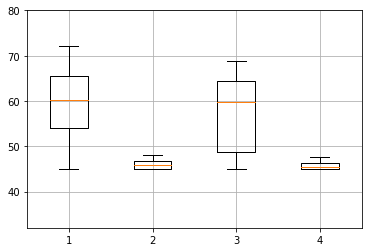

In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops=dict(marker='o',markerfacecolor='b')
plt.boxplot(tumor_vol_df,flierprops=flierprops)
plt.grid()
plt.ylim(32,80)
plt.show()

## Line and Scatter Plots

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
